In [65]:
import matplotlib.pyplot as plt
import random as random
import networkx as nx
from scipy.optimize import curve_fit
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from tqdm import tqdm
import numpy as np
from matplotlib import cm

In [54]:
#Deactivation model
def klemm_eguiluz(N0, a, max_step):
    #N0 Number of generation 0 nodes.
    #Initial network: N0 nodes fully connected
    actives = [] #List of active nodes
    inactives = [] #List of inactive nodes
    inlinks = [] #List of inlinks of each node
    indegree = []
    for i in range(0,N0):
        actives.append(i)
        inlink = [k for k in range(0,N0)] #List of outlinks|
        inlink.remove(i) #Remove itself from outlinks 
        inlinks.append(inlink)
        indegree.append(len(inlink))
    #Now we iterate to grow the network    
    for step in range(0,max_step):
        for i in actives: 
            inlinks[i] =  inlinks[i] + [N0 + step] #Adds the new node to the list of in-links of the node i
            indegree[i] += 1 #Adds +1 to all active nodes degree
        inlinks.append([]) #New node has no inlinks and degree 0
        indegree.append(0)
        
        #Deactivation step
        r = sum([(a + len(inlinks[i]))**(-1) for i in actives]) #Constant needed to calculate probability of deactivation
        p = [r**(-1)/(a+len(inlinks[i])) for i in actives] #To store probabilities of deactivation
        deactivated_node = random.choices(actives,p,k=1)[0] #Picks weighted node at random
        actives.remove(deactivated_node)
        inactives.append(deactivated_node)
        actives.append(N0 + step)
    #Creates a networkx graph with the inlinks list
    edges = []
    G = nx.Graph() #Initializes empty graph
    for i in range(0,len(inlinks)): #Iterates over all nodes
        for j in inlinks[i]: #Goes over all neighbours of the node i
            G.add_edge(i,j) #Add the edge i-j
    return G

In [130]:
Rs = []
for k in tqdm(range(0,50)):
    N0 = 3
    max_step = 10000
    G = klemm_eguiluz(N0,3,max_step)
    R = []
    betas = np.linspace(0,1,40)
    for b in betas:
        model = ep.SIRModel(G) #Selects the model to be used
        # Model Configuration
        config = mc.Configuration()
        I0 = 1 #Initial number of infected people.
        N = N0 + max_step #Population size
        indexes = [i for i in range(0,N)]
        infected_nodes = random.sample(indexes, I0) #Picks I0 initial susceptibles at random and makes them infectious
        config.add_model_initial_configuration("Infected", infected_nodes)
        config.add_model_parameter('beta', b)
        config.add_model_parameter('gamma', 1)
        model.set_initial_status(config)
        max_it = 20000
        aux_R = []
        for j in range(0,100): 
            iterations = []
            for i in range(0,max_it):
                it = model.iteration()
                iterations.append(it)
                state = it['node_count']
                if state[1] == 0:
                    break
            it = iterations[len(iterations)-1]
            state = it['node_count']
            aux_R.append(state[2])
        R.append(sum(aux_R)/len(aux_R))
    Rs.append(R)
         

100%|██████████| 50/50 [1:18:52<00:00, 94.66s/it]


In [131]:
avg_R_1 = [sum([R[i] for R in Rs])/(len(Rs)*N) for i in range(0,len(Rs[0]))]

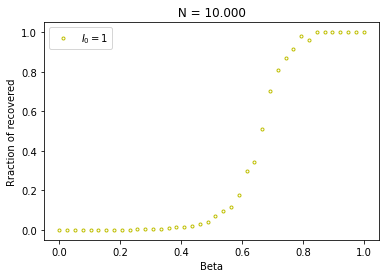

In [133]:
plt.plot(betas, avg_R_1, '.y', mfc ='none', label = r'$I_{0} = 1$')
#plt.plot(betas, avg_R_10, '.g', mfc ='none',label = r'$I_{0} = 10$',alpha = 0.5)
#plt.plot(betas, avg_R_100, '.b', mfc='none', label = r'$I_{0} = 100$',alpha = 0.5)
#plt.plot(betas, avg_R_1000, '.r', mfc ='none', label = r'$I_{0} = 1000$',alpha = 0.5)
plt.legend(loc = 'best')
plt.ylabel('Rraction of recovered')
plt.xlabel('Beta')
plt.title(' N = 10.000 ')
plt.show()

In [328]:
recovered = []
infectious = []
susceptibles = []
for i in iterations:
    states = i['node_count']
    susceptibles.append(states[0])
    infectious.append(states[1])
    recovered.append(states[2])

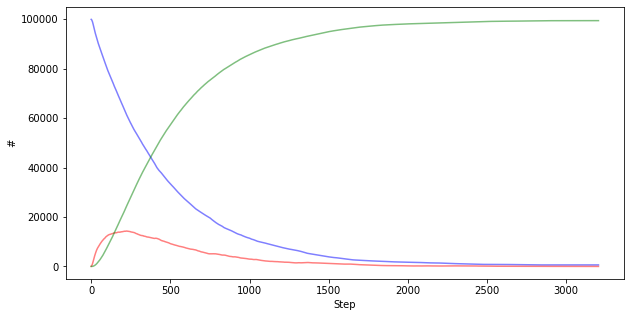

In [329]:
figure = plt.figure(figsize=(10,5))
plt.plot(susceptibles,'b',alpha = 0.5)
plt.plot(infectious,'r',alpha = 0.5)
plt.plot(recovered, 'g',alpha = 0.5)
plt.xlabel('Step')
plt.ylabel('#')
plt.show()

In [248]:
counted = [[x,indegree.count(x)] for x in set(indegree)]
k = [c[0] for c in counted]
n = [c[1] for c in counted]

In [8]:
def power_law(k,gamma,I):
    return I*(a+k)**(-gamma)

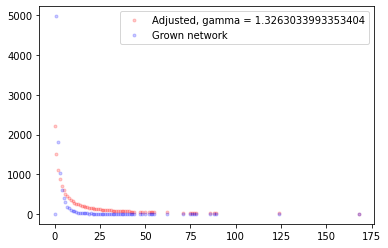

In [250]:
popt, pcov = curve_fit(power_law,k,n)
na = [power_law(i, popt[0],popt[1]) for i in k]
plt.plot(k,na,'.r',alpha = 0.2,label = 'Adjusted, gamma = ' + str(popt[0]))
plt.plot(k,n,'.b',alpha = 0.2, label = 'Grown network')
plt.legend(loc = 'best')
plt.show()

In [15]:
for s in S_f:
    G.nodes[s]['state'] = 's'
for i in I_f:
    G.nodes[i]['state'] = 'i'
for r in R_f:
    G.nodes[r]['state'] = 'r'

In [16]:
for r in R_f:
    G.remove_node(r)

In [53]:
Gcc = sorted(nx.connected_components(G), key = len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(G0)

Graph with 1000003 nodes and 3000003 edges


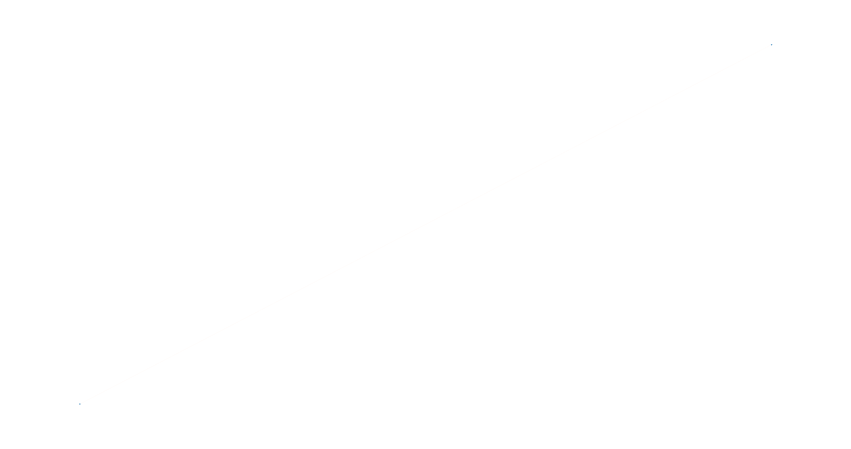

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
nx.draw_random(G,nodelist=d.keys(), node_size=[v*0.1 for v in d.values()],width = 0.01,edge_color = 'orange')